# Introduction
Partial Dependence Plot (PDP) visualises the impact of one or two features on model outcome.

# How it works
1. Once a model is trained on a dataset, a feature of interest is selected. Let's assume for clarity that the features in the dataset are X1, X2, X3, and X4; and X1 is the feature of interest.
2. Set X1 to the same value in all of the rows in the datasets, and then calculate the predicted outcome of the model for each row and average the predicted outcomes.
3. Repeat Step 2 for another value of X1.
4. Plot X1 against the average predicted outcome. The plot shows the impact of the change in values of X1 on the model prediction. 
5. Repeat Step 2, 3, 4 for another feature, as needed.

Note: One feature of interest produces 2D plots. Two simultaneous features of interest produce 3D plots. Therefore, it will be challenging to plot the partial dependences if the features of interest are more than two.

# When to use
[]

# Pros
- Model agnostic, and it is applicable for both regression and classification tasks.
- Visual. Easy to understand.
- Global method. PDP explains the global relationship of a feature with the predicted outcome.

# Cons
- PDP assumes the features are independent, which may not be true for 'real' datasets.
- Fixing the feature of interest to a particular value may introduce an impossible scenario i.e. observation that can not exist.
- Averaging the predicted outcomes of each row provide limited information. A standard deviation of the predicted outcomes, for example, will be helpful to better understand the impact of a given feature.

# Regression (Random Forest)
Using PDP on Random Forest model trained on California Housing dataset

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.datasets import fetch_california_housing


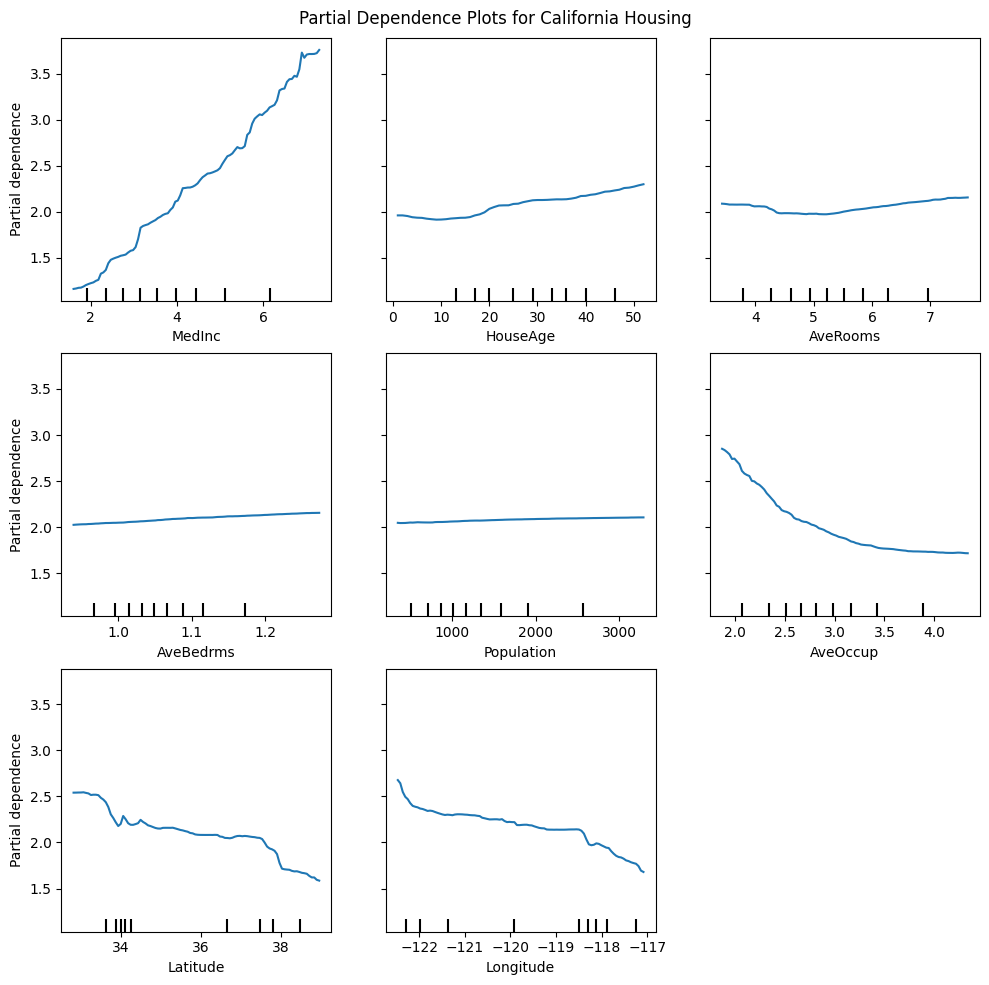

In [3]:
# Load the California housing dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Create partial dependence plots for selected features
features = ["MedInc", "AveRooms"]  # Median Income and Average Rooms

fig, ax = plt.subplots(figsize=(10, 10))
PartialDependenceDisplay.from_estimator(
    rf,
    X,
    # features=features,
    features=X.columns,
    feature_names=X.columns,
    ax=ax
)

plt.suptitle("Partial Dependence Plots for California Housing")
plt.tight_layout()
plt.show()


# Classification (Random Forest)
Using PDP on Random Forest model trained on Iris dataset

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split

In [23]:
data = load_iris(as_frame=True)
X = data.data
y = data.target
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


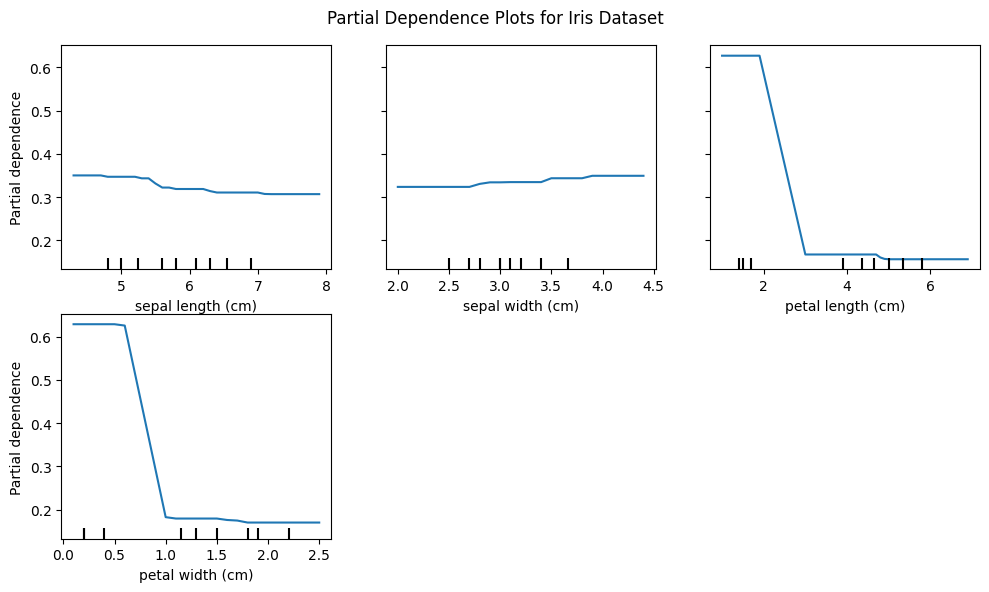

In [36]:
# Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier as the black-box model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)

# Select two features for the 2D PDP
features = ['sepal length (cm)', 'sepal width (cm)']

fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    rf,
    X,
    # features=features,
    features=X.columns,
    feature_names=X.columns,
    ax=ax,
    target=rf.classes_.all()
)

plt.suptitle("Partial Dependence Plots for Iris Dataset")
plt.tight_layout()
plt.show()


In [25]:
rf.classes_

array([0, 1, 2])